# Local Law No. 44

##### Local Law No. 44 of 2012 (LL44) requires the Department of Housing Preservation and Development (HPD) to report about Housing Development Projects receiving City Financial Assistance as defined in the law.  The law became effective January 1, 2013 but includes Housing Development Projects for which the developer was selected after January 1, 2008. 

###### This dataset contains information on housing development projects that have received financial assistance from the City. The data includes project- and building-level data; funding information; rent and affordability by unit; information about the developer (Borrower Legal Entity), general contractor, and subcontractors; and wage reporting information. HPD is required to report out on projects that meet the Housing Development Project criteria as defined by Local Law 44. This collection has a total of 11 data tables.

##### all datasets can be found at the following [link](https://data.cityofnewyork.us/browse?Data-Collection_Data-Collection=HPD%20Local%20Law%2044) 

## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Projects

##### The Projects data table contains information about Housing Development Projects about which HPD is required to report pursuant to Local Law 44 of 2012.  This includes general project information such as start and completion dates, units, Borrower Legal Entity, general contractor (GC), and prevailing wage information.  There is a one-to-one relationship between this information and the project. This is part of the Housing Projects Receiving City Financial Assistance (Local Law 44) collection of data tables.

In [50]:
# Load data
df_projects = pd.read_csv('csv/Local_Law_44_-_Projects_20240123.csv')

In [51]:
# View dataframe
df_projects.head()

,ProjectDWID,ProjectID,ProjectName,ProgramGroup,StartDate,ProjectedCompletionDate,Counted Rental Units,Counted Homeownership Units,All Counted Units,TotalProjectUnits,CommercialSquareFootage,BorrowerLegalEntityName,GeneralContractorName,IsDavisBacon,IsSection220NYSLaborLaw
0,19294,44218,MEC E. 125TH ST. PARCEL B WEST,Multifamily Finance Program,12/31/2018,02/16/2022,297,0,297.0,404,62204,EAST HARLEM MEC PARCEL B WEST LLC,MONADNOCK CONSTRUCTION,No,No
1,19487,44223,ROCHESTER SUYDAM PHASE 1,Multifamily Finance Program,06/30/2021,NaN,0,46,46.0,46,0,BJF DEVELOPMENT LLC,"Z H L GROUP, INC.",No,No
2,19059,44225,Brook Avenue Apartments,Multifamily Finance Program,06/27/2014,12/28/2016,66,0,66.0,66,1965,"BX Properties, LLC",Yuco Builders LLC,No,No
3,19421,44230,Mermaid / West. 16th Street,Small Homes Program,06/30/2015,07/21/2017,14,7,21.0,21,0,NEPTUNE II LLC,Shelter Rock Builders LLC,No,No
4,19348,44239,Home for Harlem Dowling,Multifamily Finance Program,06/30/2014,12/29/2016,60,0,60.0,60,0,Harlem Dowling Alembic LLC,"Mega Contracting, Inc.",No,No


In [52]:
df_projects.describe()

,ProjectDWID,ProjectID,Counted Rental Units,Counted Homeownership Units,All Counted Units,TotalProjectUnits,CommercialSquareFootage
count,913.000000,913.000000,913.000000,913.000000,784.000000,913.000000,9.130000e+02
mean,34529.847755,56953.131435,91.170865,46.577218,173.830357,189.561884,5.967545e+03
std,17416.031473,7904.367221,136.893028,566.195063,616.380700,603.862566,5.163285e+04
min,18364.000000,44218.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,19283.000000,50205.000000,0.000000,0.000000,48.000000,45.000000,0.000000e+00
50%,22600.000000,54727.000000,50.000000,0.000000,94.000000,94.000000,0.000000e+00
75%,52976.000000,64436.000000,132.000000,0.000000,173.250000,179.000000,2.990000e+03
max,71847.000000,72160.000000,1527.000000,15372.000000,15372.000000,15372.000000,1.488023e+06


In [53]:
# Get all columns in dataframe
for col in df_projects.columns:
    print(col)

ProjectDWID
ProjectID
ProjectName
ProgramGroup
StartDate
ProjectedCompletionDate
Counted Rental Units
Counted Homeownership Units
All Counted Units
TotalProjectUnits
CommercialSquareFootage
BorrowerLegalEntityName
GeneralContractorName
IsDavisBacon
IsSection220NYSLaborLaw


In [54]:
# Get all column types
df_projects.dtypes

ProjectDWID                      int64
ProjectID                        int64
ProjectName                     object
ProgramGroup                    object
StartDate                       object
ProjectedCompletionDate         object
Counted Rental Units             int64
Counted Homeownership Units      int64
All Counted Units              float64
TotalProjectUnits                int64
CommercialSquareFootage          int64
BorrowerLegalEntityName         object
GeneralContractorName           object
IsDavisBacon                    object
IsSection220NYSLaborLaw         object
dtype: object

In [55]:
# Get unique values 
df_projects["ProgramGroup"].unique()

array(['Multifamily Finance Program', 'Small Homes Program',
       'Multifamily Incentives Program', 'Homeowner Assistance Program',
       'Sandy Program', 'Other'], dtype=object)

In [22]:
# Clean Data

In [64]:
# Convert date columns from object to time 
df_projects['ProjectedCompletionDate'] = pd.to_datetime(df_projects['ProjectedCompletionDate'])
df_projects['StartDate'] = pd.to_datetime(df_projects['StartDate'])
print(df_projects['ProjectedCompletionDate'])
print(df_projects['StartDate'])

0     2022-02-16
1            NaT
2     2016-12-28
3     2017-07-21
4     2016-12-29
         ...    
908          NaT
909          NaT
910          NaT
911          NaT
912          NaT
Name: ProjectedCompletionDate, Length: 913, dtype: datetime64[ns]
0     2018-12-31
1     2021-06-30
2     2014-06-27
3     2015-06-30
4     2014-06-30
         ...    
908   2022-06-30
909   2022-10-12
910   2021-12-01
911   2022-09-13
912   2022-12-16
Name: StartDate, Length: 913, dtype: datetime64[ns]


In [73]:
# Filter by rezoning approval 2021-11-10
df_projects_filteredStartDate = df_projects[(df_projects["StartDate"] >"2021-11-10")].sort_values(by='StartDate', ascending=False)
print(df_projects_filteredStartDate["StartDate"])


740   2022-12-28
683   2022-12-22
768   2022-12-22
647   2022-12-20
832   2022-12-19
         ...    
833   2021-12-14
763   2021-12-08
910   2021-12-01
905   2021-11-23
874   2021-11-18
Name: StartDate, Length: 73, dtype: datetime64[ns]


In [ ]:
# Visualize data

In [ ]:
# Filter for Gowanus Rezoning

## Buildings

##### The Building data table Includes building-level information such as address, other location identifiers, stories, and square footage at base about which HPD is required to report pursuant to Local Law 44 of 2012, and is part of the Housing Projects Receiving City Financial Assistance (Local Law 44) collection of data tables.

In [74]:
# Load data
df_buildings = pd.read_csv('csv/Local_Law_44_-_Building_20240123.csv')

In [75]:
# View data
df_buildings.head(100)

,ProjectID,BuildingID,ReportingConstructionType,Borough,Block,Lot,BIN,HouseNumber,StreetName,CountedRentalUnits,...,BaseSquareFootage,Stories,BBL,Community Board,Council District,Census Tract,NTA,Latitude,Longitude,Postcode
0,44218,987329,New Construction,NaN,1790,1,1054691.0,2319,3 AVENUE,297,...,35436.0,19.0,1.017900e+09,11.0,8.0,242.0,MN34,40.804265,-73.935390,10035.0
1,44223,927737,New Construction,NaN,1556,3,3000000.0,335,RALPH AVENUE,0,...,1989.0,7.0,3.015560e+09,3.0,41.0,301.0,BK79,40.677644,-73.921745,11233.0
2,44223,969695,New Construction,NaN,1709,10,3000000.0,35,ROCHESTER AVENUE,0,...,1720.0,4.0,3.017090e+09,3.0,36.0,299.0,BK61,40.677925,-73.927466,11233.0
3,44223,975702,New Construction,NaN,1709,27,3000000.0,18-22,SUYDAM PLACE,0,...,2778.0,4.0,3.017090e+09,3.0,36.0,299.0,BK61,40.677823,-73.926554,11233.0
4,44223,977564,New Construction,NaN,1556,8,NaN,329/331,RALPH AVENUE,0,...,2925.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,44888,949804,New Construction,NaN,3355,121,2128753.0,3349,WEBSTER AVENUE,0,...,9873.0,8.0,2.033550e+09,7.0,11.0,42902.0,BX43,40.877740,-73.871871,10467.0
96,45223,934780,New Construction,NaN,2551,40,2119743.0,637,EAST 138 STREET,0,...,8400.0,6.0,2.025510e+09,1.0,8.0,2702.0,BX39,40.805828,-73.915128,10454.0
97,45223,966437,New Construction,NaN,2551,30,2127488.0,616,EAST 139 STREET,0,...,5600.0,6.0,2.025510e+09,1.0,8.0,2702.0,BX39,40.806384,-73.914383,10454.0
98,45265,38122,Preservation,NaN,1829,38,1055164.0,214,WEST 114 STREET,0,...,4900.0,5.0,1.018290e+09,10.0,9.0,216.0,MN11,40.802194,-73.954153,10026.0


In [9]:
df_buildings.describe()

,ProjectID,BuildingID,Borough,Block,Lot,BIN,CountedRentalUnits,CountedHomeownershipUnits,AllCountedUnits,TotalBuildingUnits,BaseSquareFootage,Stories,BBL,Community Board,Council District,Census Tract,Latitude,Longitude,Postcode
count,3073.000000,3.073000e+03,0.0,3073.000000,3073.000000,2.944000e+03,3073.000000,3073.000000,3073.000000,3073.000000,3013.000000,3040.000000,2.944000e+03,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000
mean,57040.163684,4.645838e+05,NaN,3398.157501,574.553205,2.439718e+06,26.953140,13.838269,40.769932,56.393752,16626.473614,6.057566,2.369772e+09,6.827288,22.994128,7625.583420,40.751558,-73.913794,10712.020035
std,7832.130367,3.898379e+05,NaN,2815.194401,1900.088648,1.006604e+06,60.003405,56.309542,77.646510,94.160890,44911.850544,5.449488,9.518152e+08,4.237003,14.129973,20657.127163,0.083580,0.054269,517.461948
min,44218.000000,3.750000e+02,NaN,6.000000,1.000000,1.000000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.001980e+09,1.000000,1.000000,1.000000,40.564987,-74.171232,10001.000000
25%,50248.000000,6.685500e+04,NaN,1828.000000,14.000000,2.000344e+06,0.000000,0.000000,0.000000,6.000000,1150.000000,3.000000,2.023640e+09,3.000000,9.000000,187.000000,40.676158,-73.945366,10451.000000
50%,53680.000000,3.445030e+05,NaN,2720.000000,37.000000,2.116452e+06,4.000000,0.000000,8.000000,16.000000,3400.000000,5.000000,2.042950e+09,5.000000,17.000000,303.000000,40.782276,-73.916263,10467.000000
75%,65227.000000,9.346630e+05,NaN,4060.000000,75.000000,3.082876e+06,22.000000,0.000000,37.000000,60.000000,10460.000000,6.000000,3.038192e+09,10.000000,36.000000,1128.000000,40.826239,-73.890482,11217.000000
max,72160.000000,1.007121e+06,NaN,16250.000000,9080.000000,5.122976e+06,542.000000,431.000000,542.000000,1093.000000,743204.000000,57.000000,5.040640e+09,27.000000,50.000000,122701.000000,40.906251,-73.730624,11694.000000


In [10]:
# Get all columns in dataframe
for col in df_buildings.columns:
    print(col)

ProjectID
BuildingID
ReportingConstructionType
Borough
Block
Lot
BIN
HouseNumber
StreetName
CountedRentalUnits
CountedHomeownershipUnits
AllCountedUnits
TotalBuildingUnits
BaseSquareFootage
Stories
BBL
Community Board
Council District
Census Tract
NTA
Latitude
Longitude
Postcode


In [11]:
# Get all column types in dataframe
df_buildings.dtypes

ProjectID                      int64
BuildingID                     int64
ReportingConstructionType     object
Borough                      float64
Block                          int64
Lot                            int64
BIN                          float64
HouseNumber                   object
StreetName                    object
CountedRentalUnits             int64
CountedHomeownershipUnits      int64
AllCountedUnits                int64
TotalBuildingUnits             int64
BaseSquareFootage            float64
Stories                      float64
BBL                          float64
Community Board              float64
Council District             float64
Census Tract                 float64
NTA                           object
Latitude                     float64
Longitude                    float64
Postcode                     float64
dtype: object

In [64]:
df_buildings["Postcode"].unique()

array([10035., 11233.,    nan, 11224., 10027., 10458., 11215., 10025.,
       10026., 11218., 10451., 11207., 10011., 11221., 11216., 11206.,
       11249., 10019., 10452., 11208., 10455., 10453., 10457., 10462.,
       11217., 10460., 10467., 10454., 10459., 10029., 10468., 11226.,
       11213., 10466., 10031., 10039., 11237., 10473., 10472., 10456.,
       10024., 10030., 10037., 10032., 11201., 10474., 11238., 10034.,
       11212., 10003., 11222., 10036., 10302., 11365., 10033., 11239.,
       11105., 11205., 10001., 11203., 10475., 10012., 10009., 11101.,
       10040., 11435., 10128., 10016., 11433., 11423., 11429., 11422.,
       11413., 11412., 11411., 10303., 11421., 11231., 11211., 10471.,
       11369., 11434., 11432., 11427., 11419., 11692., 11210., 11235.,
       11693., 10013., 11694., 11236., 10463., 11691., 11214., 11414.,
       10014., 10465., 10002., 10306., 11436., 10010., 11368., 11220.,
       11420., 11417., 10304., 11225., 10314., 11355., 11232., 10470.,
      

In [78]:
df_buildings["NTA"].unique()

array(['MN34', 'BK79', 'BK61', nan, 'BK21', 'MN03', 'BX40', 'BK37',
       'MN09', 'MN11', 'BK88', 'BX35', 'BK82', 'MN13', 'BK35', 'BK75',
       'BK85', 'BK73', 'MN15', 'BX26', 'BX39', 'BX36', 'BX41', 'BX59',
       'BK68', 'BX75', 'BK83', 'BX17', 'BX43', 'BX33', 'MN33', 'BX05',
       'BK60', 'BX99', 'BX44', 'MN04', 'BK78', 'BX30', 'BX27', 'BK77',
       'BX09', 'BX55', 'BX01', 'MN12', 'MN06', 'MN36', 'BK38', 'BX63',
       'BK69', 'MN01', 'BK81', 'MN22', 'BX34', 'BK90', 'SI28', 'QN48',
       'BK64', 'BX62', 'BX14', 'QN72', 'BK23', 'BX13', 'MN24', 'BX06',
       'QN31', 'MN35', 'BX28', 'MN17', 'QN61', 'QN01', 'MN32', 'MN28',
       'MN20', 'QN07', 'QN34', 'QN05', 'QN66', 'QN08', 'QN33', 'SI12',
       'BK42', 'BK95', 'QN53', 'BK76', 'BK33', 'BX08', 'BX22', 'BX07',
       'QN27', 'QN76', 'QN02', 'QN03', 'QN38', 'QN06', 'QN54', 'QN12',
       'BK17', 'BK26', 'BK19', 'QN10', 'BK50', 'QN15', 'QN57', 'MN23',
       'BX52', 'MN27', 'SI45', 'BK96', 'MN21', 'QN25', 'BK32', 'BK28',
       'Q

In [103]:
oneProject = df_buildings[df_buildings["HouseNumber"]== '540']
print(oneProject)

      ProjectID  BuildingID ReportingConstructionType  Borough  Block  Lot  \
124       47838      321766              Preservation      NaN   1607   26   
2597      67895        5318              Preservation      NaN   1083    1   

            BIN HouseNumber         StreetName  CountedRentalUnits  ...  \
124   3043454.0         540  KOSCIUSZKO STREET                   0  ...   
2597  1086807.0         540     WEST 55 STREET                   0  ...   

      BaseSquareFootage  Stories           BBL  Community Board  \
124              2500.0      3.0  3.016070e+09              3.0   
2597            52720.0     38.0  1.010830e+09              4.0   

      Council District  Census Tract   NTA   Latitude  Longitude Postcode  
124               36.0         289.0  BK35  40.692791 -73.932476  11221.0  
2597               6.0         135.0  MN15  40.768560 -73.991307  10019.0  

[2 rows x 23 columns]


In [ ]:
# Clean data

In [81]:
# Change NTA column from object to string
df_buildings["NTA"] = df_buildings["NTA"].astype(str)

In [83]:
# Filter by Borough
df_buildings_filtered = df_buildings[(df_buildings["Community Board"] == 6.0) & (df_buildings["NTA"].str.contains("BK"))]
#print(df_buildings_filtered["Community Board"])
#print(df_buildings_filtered["NTA"])
print(df_buildings_filtered)

      ProjectID  BuildingID ReportingConstructionType  Borough  Block   Lot  \
14        44250      927161          New Construction      NaN   1028     7   
523       48908      139704              Preservation      NaN   1043    21   
672       50193      329481              Preservation      NaN    373    46   
673       50193      341859              Preservation      NaN    526    15   
674       50193      341863              Preservation      NaN    526    20   
675       50193      341864              Preservation      NaN    526    20   
676       50193      387264              Preservation      NaN    530    10   
677       50193      808774              Preservation      NaN    373    46   
913       51056      211091              Preservation      NaN    399     1   
914       51056      216349              Preservation      NaN    411    11   
1185      52737      128902              Preservation      NaN    413    36   
1186      52737      130195              Preservatio

In [99]:
# Get unique values from Builiding ID Column
buildingIDs_unique = df_buildings_filtered["BuildingID"].unique()

In [ ]:
# Visualize data

In [ ]:
# Filter for Gowanus Rezoning

## Rent Affordability

##### The Rent Affordability data table includes units disaggregated by rent affordability for each building in a Local Law 44 Housing Development Project. This information is reported pursuant to Local Law 44 of 2012, and is part of the Housing Projects Receiving City Financial Assistance (Local Law 44) collection of data tables.

In [87]:
# Load data
df_rent_affordability = pd.read_csv('csv/Local_Law_44_-_Rent_Affordability_20240115.csv')

In [88]:
# View data
df_rent_affordability.head(100)

,ProjectID,BuildingID,AffordabilityBand,TotalUnits
0,44218,987329.0,Low Income,101
1,44218,987329.0,Middle Income,200
2,44218,987329.0,Other,2
3,44218,987329.0,Very Low Income,101
4,44223,969695.0,Middle Income,6
...,...,...,...,...
95,44319,955280.0,Very Low Income,1
96,44319,955279.0,Low Income,6
97,44324,927213.0,Low Income,24
98,44324,927213.0,Middle Income,52


In [89]:
df_rent_affordability.describe()

,ProjectID,BuildingID,TotalUnits
count,6420.000000,6.393000e+03,6420.000000
mean,58696.791121,4.514961e+05,26.329128
std,7908.112566,3.984601e+05,55.232463
min,44218.000000,3.750000e+02,1.000000
25%,51300.750000,6.490100e+04,2.000000
50%,58864.000000,3.264700e+05,6.000000
75%,66670.000000,9.481780e+05,23.000000
max,72160.000000,1.007121e+06,1093.000000


In [90]:
# Get all columns in dataframe
for col in df_rent_affordability.columns:
    print(col)

ProjectID
BuildingID
AffordabilityBand
TotalUnits


In [91]:
# Get all column type in dataframe
df_rent_affordability.dtypes

ProjectID              int64
BuildingID           float64
AffordabilityBand     object
TotalUnits             int64
dtype: object

In [92]:
df_rent_affordability["AffordabilityBand"][2]

'Other'

In [98]:
# Filter by unique BuildingIDs
df_rent_affordability_filtered = df_rent_affordability[(df_rent_affordability["BuildingID"].isin(buildingIDs_unique))]
print(df_rent_affordability_filtered)
                                                       
                                                       
                                                       

      ProjectID  BuildingID     AffordabilityBand  TotalUnits
23        44250    927161.0  Extremely Low Income           8
861       48908    139704.0  Extremely Low Income           2
862       48908    139704.0         Middle Income           6
1150      50193    341859.0            Low Income           6
1151      50193    341863.0            Low Income           8
...         ...         ...                   ...         ...
5446      68405    365721.0            Low Income           2
5447      68405    365721.0       Very Low Income           5
5448      68409    991162.0            Low Income           5
5449      68409    996618.0        Not Applicable           2
5450      68409    996617.0        Not Applicable           2

[76 rows x 4 columns]


In [26]:
# Clean data

In [28]:
# Create function to assign numbers to each affordability band
def get_band_letters(band):
    if band == 'Extremely Low Income':
        return 'a'
    elif band == 'Very Low Income':
        return 'b'
    elif band == 'Low Income':
        return 'c'
    elif band == 'Moderate Income':
        return 'd'
    elif band == 'Middle Income':
        return 'e'
    elif band == 'Not Defined':
        return 'f'
    elif band == 'Not Applicable':
        return 'g'
    else:
        return 'h'

In [29]:
# Apply function to new column
df_rent_affordability["BandLetters"] = df_rent_affordability["AffordabilityBand"].apply(get_band_letters)
df_rent_affordability.head()

,ProjectID,BuildingID,AffordabilityBand,TotalUnits,BandLetters
0,44218,987329.0,Low Income,101,c
1,44218,987329.0,Middle Income,200,e
2,44218,987329.0,Other,2,h
3,44218,987329.0,Very Low Income,101,b
4,44223,969695.0,Middle Income,6,e


In [30]:
# Sort new column
sorted_df_rent_affordability = df_rent_affordability.sort_values(by="BandLetters")
sorted_df_rent_affordability.tail()

,ProjectID,BuildingID,AffordabilityBand,TotalUnits,BandLetters
5791,69246,60025.0,Other,1,h
637,48768,65052.0,Other,1,h
5098,67125,987934.0,Other,1,h
5138,67438,62841.0,Other,1,h
3923,63026,974198.0,Other,1,h


In [56]:
df_rent_affordability["AffordabilityBand"].unique()

array(['Low Income', 'Middle Income', 'Other', 'Very Low Income',
       'Moderate Income', 'Extremely Low Income', 'Not Applicable',
       'Not Defined'], dtype=object)

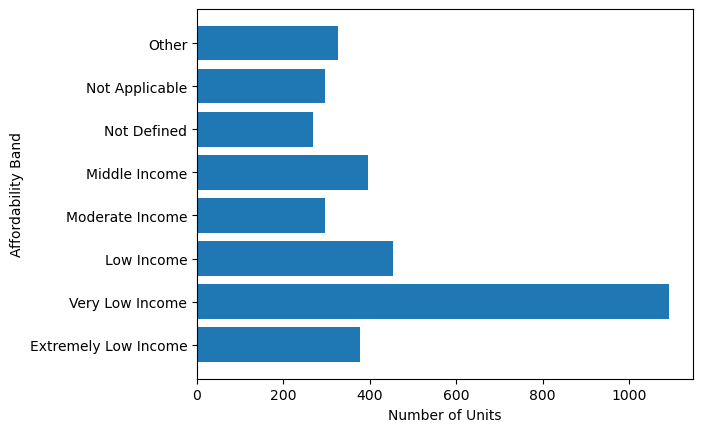

In [31]:
# Visualize data
plt.barh(sorted_df_rent_affordability["AffordabilityBand"], df_rent_affordability["TotalUnits"])

plt.xlabel('Number of Units')
plt.ylabel('Affordability Band')
plt.show()

In [ ]:
# Filter for Gowanus Rezoning

## Unit Income Rent

##### The Unit Income Rent data table includes the number of bedrooms disaggregated by maximum allowable household income and initial legal and actual rents for each building in a Local Law 44 Housing Development Project. This information is reported pursuant to Local Law 44 of 2012, and is part of the Housing Projects Receiving City Financial Assistance (Local Law 44) collection of data tables.

In [48]:
# Load data
df_unit_income_rent = pd.read_csv('csv/Local_Law_44_-_Unit_Income_Rent_20240123.csv')

In [49]:
# View data
df_unit_income_rent.head()

,ProjectID,BuildingID,BedroomSize,MaxAllowableIncome,TotalUnits,MedianInitialLegalRent,HighInitialLegalRent,LowInitialLegalRent,MedianActualRent,HighActualRent,LowActualRent
0,50206,287193.0,2-BR,0%-30%,1,1554.0,1554.0,1554.0,0.0,0.0,0.0
1,50206,383480.0,STUDIO,0%-30%,1,1531.0,1531.0,1531.0,0.0,0.0,0.0
2,50206,383478.0,2-BR,0%-30%,1,1554.0,1554.0,1554.0,0.0,0.0,0.0
3,52674,4060.0,2-BR,0%-30%,1,NaN,NaN,NaN,NaN,NaN,NaN
4,52674,41105.0,2-BR,0%-30%,1,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df_unit_income_rent.describe()

,ProjectID,BuildingID,TotalUnits,MedianInitialLegalRent,HighInitialLegalRent,LowInitialLegalRent,MedianActualRent,HighActualRent,LowActualRent
count,19559.000000,1.947400e+04,19559.000000,5964.000000,5964.000000,5964.000000,8552.000000,8552.000000,8552.000000
mean,59701.737666,5.011819e+05,9.747891,1359.252264,1494.342220,1268.261905,963.981291,1124.294902,845.201006
std,8003.318237,4.066474e+05,21.196180,1147.340415,1922.241609,1079.683364,508.453138,1661.959791,541.275745
min,44218.000000,3.750000e+02,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52425.000000,7.723200e+04,1.000000,870.375000,928.000000,775.000000,704.000000,780.000000,565.000000
50%,60020.000000,3.750150e+05,3.000000,1149.500000,1263.000000,1065.000000,879.000000,1002.000000,774.000000
75%,67806.000000,9.522540e+05,9.000000,1637.000000,1741.000000,1573.000000,1135.625000,1292.000000,1050.000000
max,72160.000000,1.006444e+06,392.000000,43106.000000,91018.000000,35000.000000,11440.000000,91018.000000,11440.000000


In [51]:
# Get all columns in dataframe
for col in df_unit_income_rent.columns:
    print(col)

ProjectID
BuildingID
BedroomSize
MaxAllowableIncome
TotalUnits
MedianInitialLegalRent
HighInitialLegalRent
LowInitialLegalRent
MedianActualRent
HighActualRent
LowActualRent


In [52]:
# Get all collumn types in dataframe
df_unit_income_rent.dtypes

ProjectID                   int64
BuildingID                float64
BedroomSize                object
MaxAllowableIncome         object
TotalUnits                  int64
MedianInitialLegalRent    float64
HighInitialLegalRent      float64
LowInitialLegalRent       float64
MedianActualRent          float64
HighActualRent            float64
LowActualRent             float64
dtype: object

In [54]:
# Clean data
df_unit_income_rent["BedroomSize"].unique()

array(['2-BR', 'STUDIO', '1-BR', '3-BR', '5-BR', '4-BR', nan, '7-BR',
       '6-BR', 'Unknown', 'Studio'], dtype=object)

In [55]:
df_unit_income_rent["MaxAllowableIncome"].unique()

array(['0%-30%', '101%-110%', '111%-120%', '91%-100%', '121%-130%',
       '131%-140%', '141%-150%', '151%-160%', '161%-165%', '161%-170%',
       'Other', '171%-180%', '181%-190%', '191%-200%', '201%-210%',
       '211%-220%', '221%-230%', '31%-40%', '41%-50%', '51%-60%',
       '61%-65%', '66%-70%', '71%-80%', '81%-90%', nan], dtype=object)

TypeError: 'value' must be an instance of str or bytes, not a float

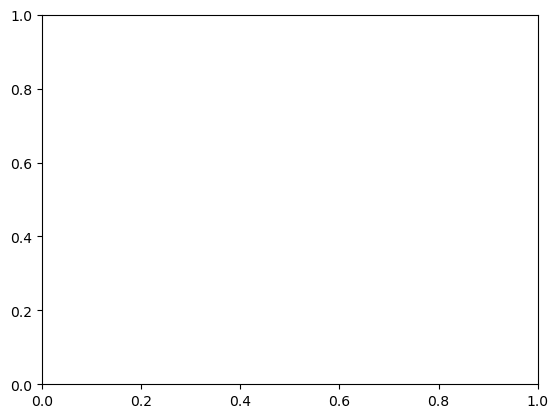

In [64]:
# Visualize data
plt.bar(df_unit_income_rent["BedroomSize"], df_unit_income_rent["TotalUnits"])
plt.show()

In [ ]:
# Filter for Gowanus Rezoning